In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

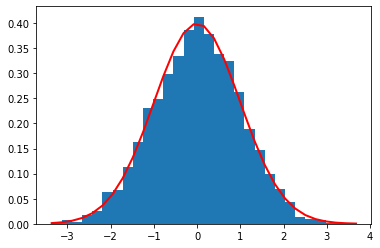

In [2]:
mu1 = 0
sigma1 = 1
A = np.random.normal(mu1, sigma1, 5000)
count, bins, ignored = plt.hist(A, 30, density=True)
plt.plot(bins, 1/(sigma1 * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu1)**2 / (2 * sigma1**2) ),
         linewidth=2, color='r')
plt.show()

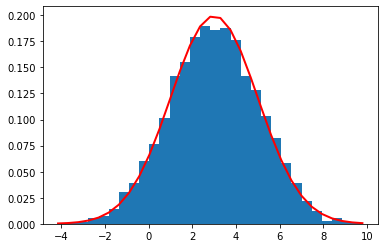

In [3]:
mu2 = 3
sigma2 = 2
B = np.random.normal(mu2, sigma2, 5000)
count, bins, ignored = plt.hist(B, 30, density=True)
plt.plot(bins, 1/(sigma2 * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu2)**2 / (2 * sigma2**2) ),
         linewidth=2, color='r')
plt.show()

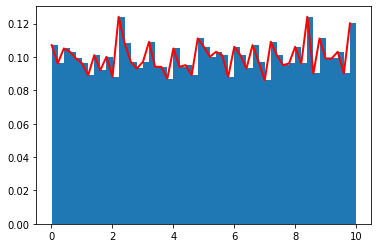

In [4]:
low = 0
high = 10
C = np.random.uniform(low, high, 5000)
count, bins, ignored = plt.hist(C, 50, density=True)
plt.plot(bins[0:-1], count,
         linewidth=2, color='r')
plt.show()

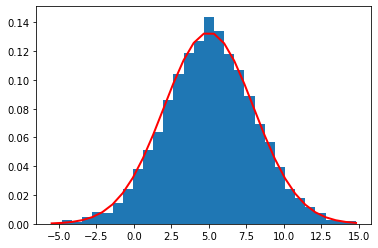

In [5]:
mu3 = 5
sigma3 = 3
D = np.random.normal(mu3, sigma3, 5000)
count, bins, ignored = plt.hist(D, 30, density=True)
plt.plot(bins, 1/(sigma3 * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu3)**2 / (2 * sigma3**2) ),
         linewidth=2, color='r')
plt.show()

In [6]:
data = np.vstack((A, B, C, D))
data = data.transpose()
df = pd.DataFrame(data = data, index=list(range(5000)), columns = ['A', 'B', 'C', 'D'])
df['Y'] = 1 #default is health

In [7]:
df.head(5)

,A,B,C,D,Y
0,-1.467019,2.509774,7.085354,3.643613,1
1,-0.363793,-0.003129,8.049967,8.651216,1
2,0.168278,1.836974,3.194959,4.383505,1
3,0.158099,3.649238,1.762599,3.424036,1
4,0.962519,0.595401,4.050700,5.580507,1


In [8]:
A_ = -0.196
B_ = -0.76
C_ = 5
D_ = -0.49

# The possible of unhealthy subsets

- case 1: feature A is outside of normal range  25\% of negative data
- case 2: feature B and C are outside of normal ranges 0.3 * 0.5
- case 3: feature B and D are outside of normal ranges 0.3 * 0.33

In [9]:
df.iloc[(df.A < A_) | ((df.B < B_) & (df.C < C_)) | ((df.B < B_) & (df.D < D_)),4] = 0

In [10]:
df.head(10)

,A,B,C,D,Y
0,-1.467019,2.509774,7.085354,3.643613,0
1,-0.363793,-0.003129,8.049967,8.651216,0
2,0.168278,1.836974,3.194959,4.383505,1
3,0.158099,3.649238,1.762599,3.424036,1
4,0.962519,0.595401,4.050700,5.580507,1
5,-0.132421,5.614773,7.254270,4.590716,1
6,0.691008,3.035759,0.659483,7.255747,1
7,0.223409,0.631217,7.600747,8.347172,1
8,-1.758987,5.251750,0.577452,3.896683,0
9,0.956261,0.918575,7.388880,4.139023,1


In [11]:
df.to_csv("synthetic_data.csv", header = False, index = False)